**REGRESSION MODEL USING MLP**

C:\Users\asmao\AppData\Local\Temp\ipykernel_19044\746303928.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-',color="r")


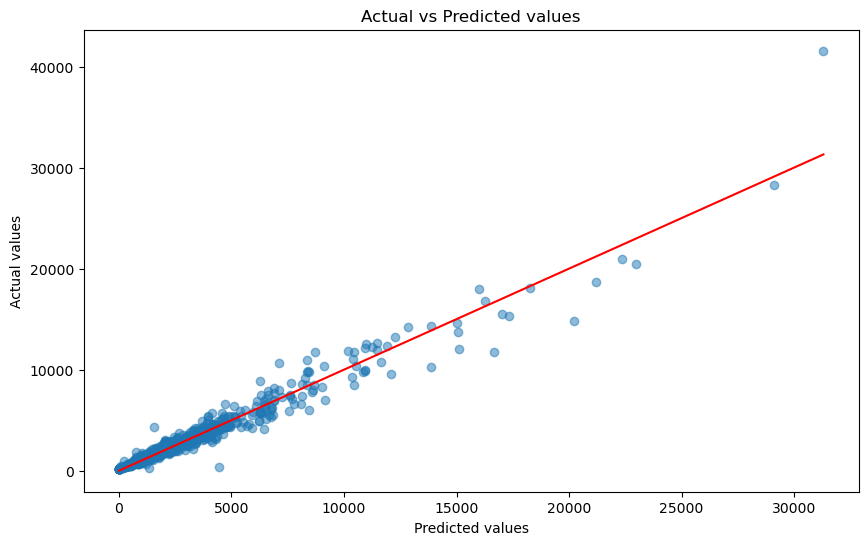

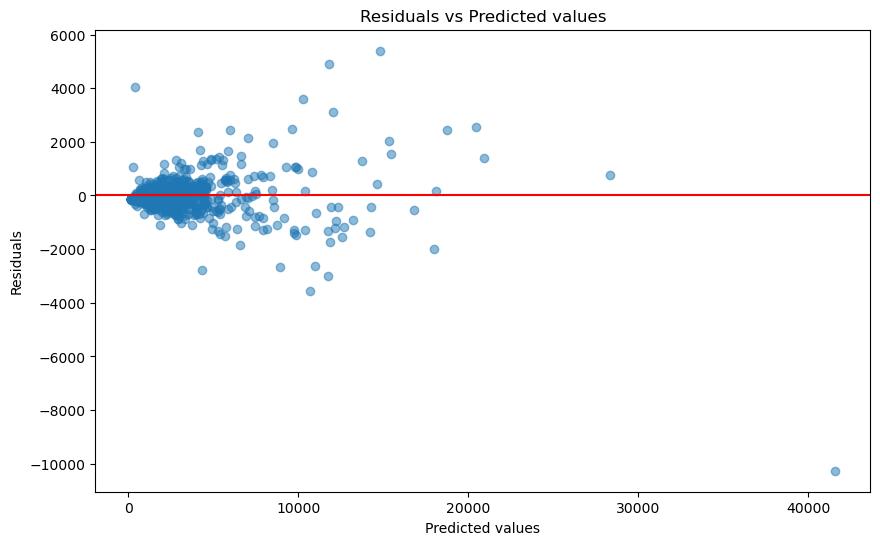

R-squared value: 0.9526293866229624
Model Representation Error 229.16969138976668


In [1]:
#For datastrucure
import pandas as pd 
import numpy as np
#To split the training data from the test one
from sklearn.model_selection import train_test_split 
#For a common data format : Standardisation
from sklearn.preprocessing import StandardScaler
#To apply MLP model
from sklearn.neural_network import MLPRegressor
#To calculate the errors
from sklearn.metrics import r2_score, mean_squared_error
#To plot results
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Regression_modeling_assignment_data_2023_04_SeoulCity_PublicBicycle_Usage.csv' 
data = pd.read_csv(file_path)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Exercise_Amount', 'Usage_Time']])
scaled_data = pd.DataFrame(scaled_data, columns=['Exercise_Amount', 'Usage_Time'])
scaled_data['Travel_Distance'] = data['Travel_Distance']

# Splitting the dataset into training and testing sets
# Split with an approximated value of 80% for the training dataset
train_data, test_data = train_test_split(scaled_data, test_size=0.1, random_state=55)

# Extracting features and target from the training data
X_train = train_data[['Exercise_Amount', 'Usage_Time']]
y_train = train_data['Travel_Distance']

# Extracting features and target from the testing data
X_test = test_data[['Exercise_Amount', 'Usage_Time']]
y_test = test_data['Travel_Distance']

# Building the MLP model
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64), #number of neurons and layers
    activation='identity', #no-operation activation, for linear, returns f(x)=x
    solver='adam', #for weight optimisation adam=gradient-based optimizer for large data-set
    learning_rate='adaptive', 
    max_iter=100, # Optimisation
    random_state=55
)


# Training the model
mlp.fit(X_train, y_train)

# Predicting using the model
y_pred = mlp.predict(X_test)

# The actual by predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-',color="r")
plt.show()

# The residual by predicted plot
residuals = y_test - y_pred.flatten() #reshaping the dimension of the output

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


# Evaluating the model with the Rsquared value
r2 = r2_score(y_test, y_pred)
# show
print("R-squared value:", r2)

# Model representation error
MRE = np.mean(np.abs(y_test-y_pred) / (y_test+0.01))
# show
print("Model Representation Error",MRE)
   
